## Importing the  depedancies

In [198]:
import pandas as pd
import numpy as np
from scipy.stats import iqr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from warnings import filterwarnings
filterwarnings('ignore')


### Load Dataset

In [199]:
df_flight=pd.read_excel("flight_price.xlsx")  # use pd.read_csv to read csv file and store as car_df variable

In [200]:
df_flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [201]:
# Number of rows and columns in dataframe
num_rows, num_cols = df_flight.shape
print(f'Number of rows in flight dataset is : {num_rows}')
print(f'Number of columns in flight dataset is : {num_cols}')

Number of rows in flight dataset is : 10683
Number of columns in flight dataset is : 11


In [202]:
# function to plot QQ plots along with Histograms to check normality
import scipy.stats as stat
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
def qq_plot(df, feature):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.histplot(df[feature],kde=True)
    plt.title(f'Histogram Plot for : {feature}')
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(f'Q-Q Plot for : {feature}')
    plt.show()

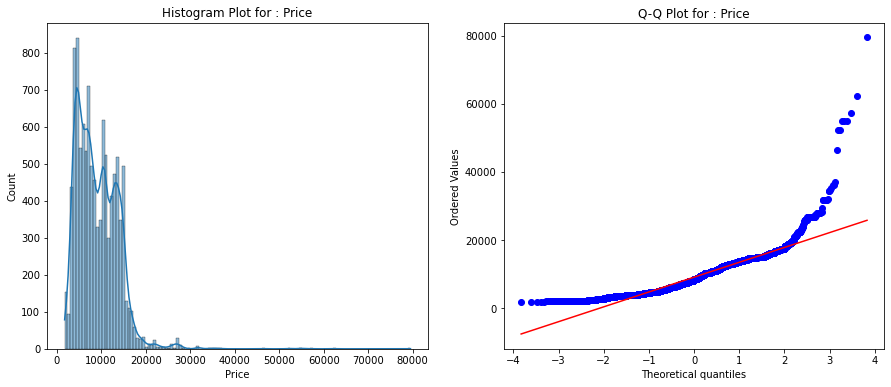

In [203]:
qq_plot(df_flight,"Price")

## Histogram shows that Price is Right (Positively) Skewed

In [204]:
# Calculate max , min and range of price in dataset
max_price = df_flight['Price'].max()
min_price = df_flight['Price'].min()
range_price = max_price - min_price

# Print Max , Min and Range values
print(f'Maximum Price of Flight is : {max_price}')
print(f'Minimum Price of Flight is : {min_price}')
print(f'Range of price is : {range_price}')

Maximum Price of Flight is : 79512
Minimum Price of Flight is : 1759
Range of price is : 77753


In [205]:
df_flight[['Price']].describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## Check the price of flights vary by airline

In [206]:
df_flight.groupby(by='Airline').describe()

Price                              \
                                    count          mean           std   
Airline                                                                 
Air Asia                            319.0   5590.260188   2027.362290   
Air India                          1752.0   9611.210616   3900.952942   
GoAir                               194.0   5861.056701   2703.585767   
IndiGo                             2053.0   5673.682903   2264.142168   
Jet Airways                        3849.0  11643.923357   4258.940578   
Jet Airways Business                  6.0  58358.666667  11667.596748   
Multiple carriers                  1196.0  10902.678094   3721.234997   
Multiple carriers Premium economy    13.0  11418.846154   1717.153936   
SpiceJet                            818.0   4338.284841   1849.922514   
Trujet                                1.0   4140.000000           NaN   
Vistara                             479.0   7796.348643   2914.298578   
Vistara Premium economy               3.0   8962.333333   2915.405518   

                                                                        \
                                       min      25%      50%       75%   
Airline                                                                  
Air Asia                            3383.0   4282.0   5162.0   6451.00   
Air India                           2050.0   6896.0   9443.0  12219.00   
GoAir                               3398.0   3898.0   5135.0   6811.25   
IndiGo                              2227.0   4226.0   5000.0   6494.00   
Jet Airways                         1840.0   9134.0  11467.0  14151.00   
Jet Airways Business               46490.0  52243.0  54747.0  61122.50   
Multiple carriers                   5797.0   7723.0  10197.0  13587.00   
Multiple carriers Premium economy   9845.0  10161.0  11269.0  11269.00   
SpiceJet                            1759.0   3574.5   3873.0   4760.00   
Trujet                              4140.0   4140.0   4140.0   4140.00   
Vistara                             3687.0   5403.0   7980.0   9345.00   
Vistara Premium economy             5969.0   7547.0   9125.0  10459.00   

                                            
                                       max  
Airline                                     
Air Asia                           13774.0  
Air India                          31945.0  
GoAir                              22794.0  
IndiGo                             22153.0  
Jet Airways                        54826.0  
Jet Airways Business               79512.0  
Multiple carriers                  36983.0  
Multiple carriers Premium economy  14629.0  
SpiceJet                           23267.0  
Trujet                              4140.0  
Vistara                            21730.0  
Vistara Premium economy            11793.0

## Compare the prices of different airlines

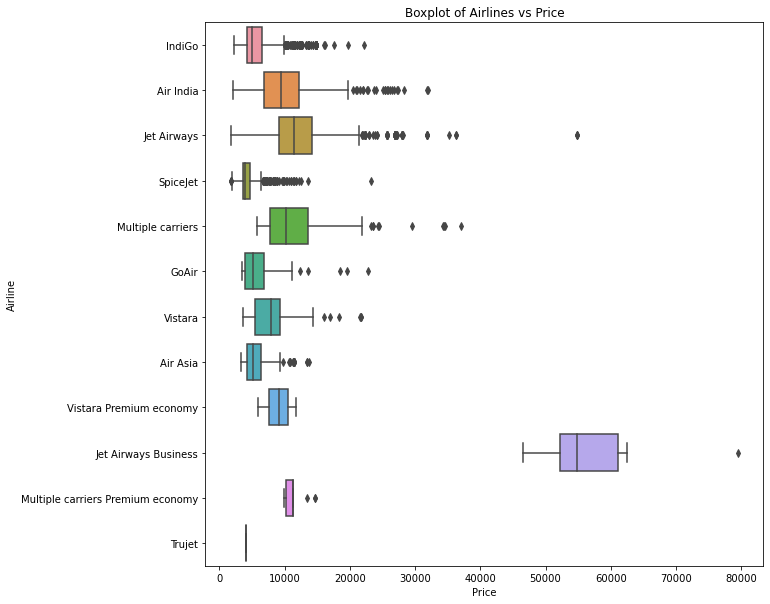

In [207]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_flight, x='Price', y='Airline')
plt.title('Boxplot of Airlines vs Price');

## Clearly show flight price values present outlier so check outlier price column

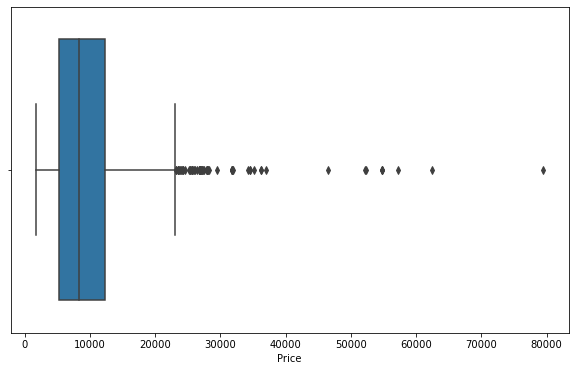

In [208]:

plt.figure(figsize=(10,6))
sns.boxplot(data=df_flight,x='Price');

In [209]:
# Calculate the IQR
q1, q3 = np.percentile(df_flight['Price'], [25, 75])
iqr_value = iqr(df_flight['Price'])

print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr_value)
print("Lower Box :",q1-1.5*iqr_value)
print("Upper Box :",q3 + 1.5*iqr_value)
print("Max Price :",df_flight['Price'].max())
print("Min Price :",df_flight['Price'].min())

Q1: 5277.0
Q3: 12373.0
IQR: 7096.0
Lower Box : -5367.0
Upper Box : 23017.0
Max Price : 79512
Min Price : 1759


In [210]:
df_flight[df_flight.Price > q3 + 1.5*iqr_value]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
10439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825


In [211]:
drop=df_flight[df_flight.Price > q3 + 1.5*iqr_value].index

In [212]:
df_flight.drop(drop,inplace=True,axis=0) #  Drop th outerliers

## Create new column date_of_journey to datetime dtype.

In [213]:
df_flight['Date_of_Journey']=pd.to_datetime(df_flight['Date_of_Journey'])

## Create more columns of date,month,year,day 

In [214]:
df_flight['Date'] = df_flight['Date_of_Journey'].dt.day
df_flight['Month'] = df_flight['Date_of_Journey'].dt.month
df_flight['Year'] = df_flight['Date_of_Journey'].dt.year
df_flight['Day'] = df_flight['Date_of_Journey'].dt.day_name()

Find average price value base on month wise,day wise,Destination wise, Starting day wise

In [215]:
df_flight.groupby(by='Month').mean()['Price'].sort_values()

Month
4     5230.860849
3     8311.850522
1     9053.510490
12    9080.251309
6     9173.877519
5     9361.077628
9     9505.993585
Name: Price, dtype: float64

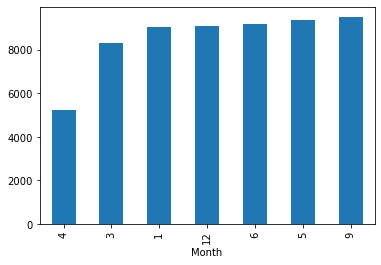

In [216]:
df_flight.groupby(by='Month').mean()['Price'].sort_values().plot(kind='bar');

In [217]:
df_flight.groupby(by='Day').mean()['Price'].sort_values()

Day
Wednesday    7996.290807
Friday       8535.776111
Saturday     8894.375727
Tuesday      8903.861201
Thursday     9120.701129
Sunday       9432.373106
Monday       9591.943396
Name: Price, dtype: float64

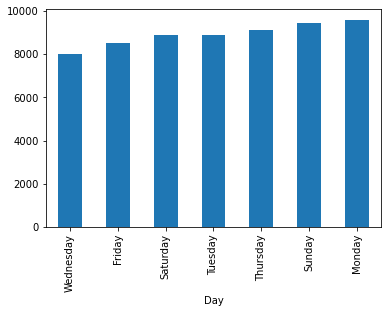

In [218]:
df_flight.groupby(by='Day').mean()['Price'].sort_values().plot(kind='bar');

In [219]:
df_flight.groupby(by='Destination').mean()['Price'].sort_values()

Destination
Kolkata       4789.892388
Hyderabad     4921.650289
Delhi         5143.918577
Banglore      9150.449826
New Delhi    10343.231395
Cochin       10467.282017
Name: Price, dtype: float64

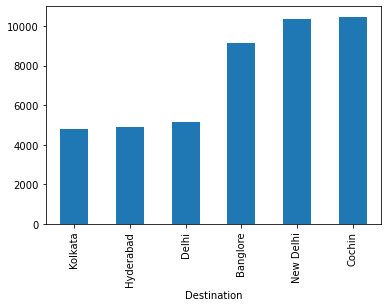

In [220]:
df_flight.groupby(by='Destination').mean()['Price'].sort_values().plot(kind='bar');

## Insights :
### 1.Cheapest Price is in Month of April with average price of 5230.86
### 2.Cheapest Prices are usually with flights departing on Wednesday at average price of 7996.29
### 3.Cheapest Flight destination is Kolkata with average price of 4789.89
### 4.Cheapest Flights are starting from city Chennai with average price of 4789.89

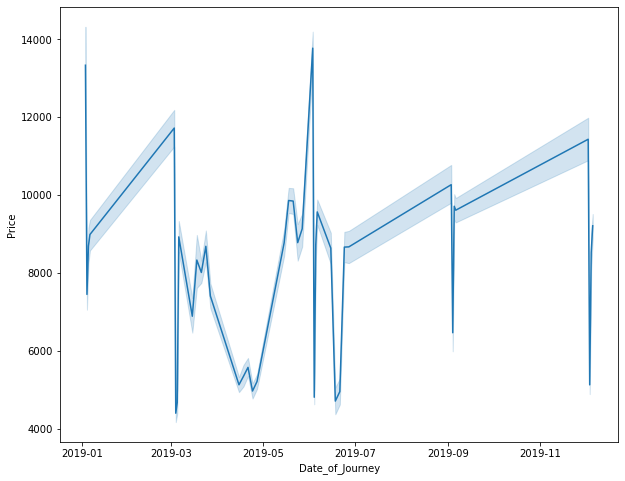

In [221]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df_flight, x='Date_of_Journey',y='Price');

## Insights:January month highest fare price and march monthlowest price 

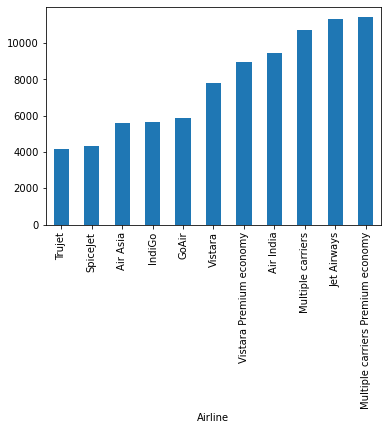

In [222]:
df_flight.groupby(by='Airline').mean()['Price'].sort_values().plot(kind='bar');

### Insights : Truejet Flights are cheapest

## Data Cleaning

In [223]:
df_flight.isna().sum()  # Check null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Day                0
dtype: int64

In [224]:
df_flight['Day_no'] = df_flight['Date_of_Journey'].dt.dayofweek
df_flight = df_flight.drop(labels=['Date_of_Journey','Day'],axis=1)
df_flight.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day_no
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019,5


In [225]:
# Arrival Feature Engineering
df_flight['Arrival_Time'] = df_flight['Arrival_Time'].apply(lambda s:s.split(' ')[0])
df_flight['Arrival_hour'] = df_flight['Arrival_Time'].str.split(':').str[0]
df_flight['Arrival_min'] = df_flight['Arrival_Time'].str.split(':').str[1]
df_flight['Arrival_hour'] = df_flight['Arrival_hour'].astype(int)
df_flight['Arrival_min'] = df_flight['Arrival_min'].astype(int)
df_flight = df_flight.drop(labels=['Arrival_Time'],axis=1)
df_flight.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day_no,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,6,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,5,1,2019,5,13,15


In [226]:
# Departure Feature Engineering
df_flight['Dep_hour'] = df_flight['Dep_Time'].str.split(':').str[0]
df_flight['Dep_min'] = df_flight['Dep_Time'].str.split(':').str[1]
df_flight['Dep_hour'] = df_flight['Dep_hour'].astype(int)
df_flight['Dep_min'] = df_flight['Dep_min'].astype(int)
df_flight = df_flight.drop(labels=['Dep_Time'],axis=1)
df_flight.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day_no,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,6,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,13,15,5,50


In [227]:
#Creating Function to get the duration of flight from string 
def get_duration_float(s):
    if ((s.find('h')>0) and (s.find('m')>0)):
        hrs = s.split('h')[0]
        mins = s.split(' ')[1][:-1]
    elif((s.find('h')>0) and (s.find('m')<0)):
        hrs = s.split('h')[0]
        mins = 0
    elif((s.find('h')<0) and (s.find('m')>0)):
        hrs = 0
        mins = s.split('m')[0]
    duration = float(hrs) + float(mins)/60
    return duration

In [228]:
df_flight['dur_float'] = df_flight['Duration'].apply(get_duration_float)
df_flight = df_flight.drop(labels=['Duration'],axis=1)
df_flight.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Day_no,Arrival_hour,Arrival_min,Dep_hour,Dep_min,dur_float
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,6,1,10,22,20,2.833333
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,13,15,5,50,7.416667


In [229]:
df_flight['Total_Stops'] = df_flight['Total_Stops'].fillna(df_flight['Total_Stops'].mode()[0])

In [230]:
stops_mapper = {
    'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4
}
df_flight['Total_Stops'] = df_flight['Total_Stops'].map(stops_mapper)
df_flight.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Day_no,Arrival_hour,Arrival_min,Dep_hour,Dep_min,dur_float
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,2019,6,1,10,22,20,2.833333
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,2019,5,13,15,5,50,7.416667


In [231]:
# Drop route and additional info
df_flight = df_flight.drop(labels=['Route','Additional_Info'],axis=1)
df_flight.head(2)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Day_no,Arrival_hour,Arrival_min,Dep_hour,Dep_min,dur_float
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,6,1,10,22,20,2.833333
1,Air India,Kolkata,Banglore,2,7662,5,1,2019,5,13,15,5,50,7.416667


In [232]:
df_flight.duplicated().sum()

222

In [233]:
df_flight = df_flight.drop_duplicates(keep='first')

In [234]:
# Save Clean File as csv
df_flight.to_csv('/FLIGHT_PRICE_ANALYSIS/flight_cleaned.csv')